In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
#Avisos
import warnings
warnings.filterwarnings('ignore')

In [138]:
df = pd.read_csv("/content/Dados Históricos - Ibovespa_4anos.csv", sep=",")
df.head(25)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,18.08.2023,115.409,114.973,115.729,114.423,"10,60M","0,37%"
1,17.08.2023,114.982,115.592,116.610,114.859,"12,75M","-0,53%"
2,16.08.2023,115.592,116.171,117.338,115.534,"18,86M","-0,50%"
3,15.08.2023,116.171,116.809,117.697,116.033,"14,64M","-0,55%"
4,14.08.2023,116.810,118.067,118.082,116.530,"11,20M","-1,06%"
5,11.08.2023,118.065,118.350,119.054,117.415,"11,87M","-0,24%"
6,10.08.2023,118.350,118.412,119.438,118.113,"12,69M","-0,05%"
7,09.08.2023,118.409,119.090,119.090,117.901,"11,25M","-0,57%"
8,08.08.2023,119.090,119.378,119.553,117.492,"10,25M","-0,24%"
9,07.08.2023,119.380,119.509,120.104,118.894,"8,73M","-0,11%"


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153 entries, 0 to 1152
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      1153 non-null   object 
 1   Último    1153 non-null   float64
 2   Abertura  1153 non-null   float64
 3   Máxima    1153 non-null   float64
 4   Mínima    1153 non-null   float64
 5   Vol.      1153 non-null   object 
 6   Var%      1153 non-null   object 
dtypes: float64(4), object(3)
memory usage: 63.2+ KB


In [140]:
df['Data'] = pd.to_datetime(df['Data'])

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153 entries, 0 to 1152
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      1153 non-null   datetime64[ns]
 1   Último    1153 non-null   float64       
 2   Abertura  1153 non-null   float64       
 3   Máxima    1153 non-null   float64       
 4   Mínima    1153 non-null   float64       
 5   Vol.      1153 non-null   object        
 6   Var%      1153 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 63.2+ KB


In [142]:
df.head(25)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2023-08-18,115.409,114.973,115.729,114.423,"10,60M","0,37%"
1,2023-08-17,114.982,115.592,116.610,114.859,"12,75M","-0,53%"
2,2023-08-16,115.592,116.171,117.338,115.534,"18,86M","-0,50%"
3,2023-08-15,116.171,116.809,117.697,116.033,"14,64M","-0,55%"
4,2023-08-14,116.810,118.067,118.082,116.530,"11,20M","-1,06%"
5,2023-11-08,118.065,118.350,119.054,117.415,"11,87M","-0,24%"
6,2023-10-08,118.350,118.412,119.438,118.113,"12,69M","-0,05%"
7,2023-09-08,118.409,119.090,119.090,117.901,"11,25M","-0,57%"
8,2023-08-08,119.090,119.378,119.553,117.492,"10,25M","-0,24%"
9,2023-07-08,119.380,119.509,120.104,118.894,"8,73M","-0,11%"


In [143]:
df = df.rename(columns={"Vol.":"Vol", "Var%":"Var", "Mínima": "Minima", "Máxima": "Maxima", "Último":"Fechamento"})

In [145]:
def convert_to_float(value):
    if "M" in value:
        return float(value.replace("M", "").replace(",", ".")) * 1000000
    elif "K" in value:
        return float(value.replace("K", "").replace(",", ".")) * 1000
    else:
        return float(value.replace(",", "."))

df["Vol"] = df["Vol"].apply(convert_to_float)

print(df)

           Data  Fechamento  Abertura   Maxima   Minima         Vol     Var
0    2023-08-18     115.409   114.973  115.729  114.423  10600000.0   0,37%
1    2023-08-17     114.982   115.592  116.610  114.859  12750000.0  -0,53%
2    2023-08-16     115.592   116.171  117.338  115.534  18860000.0  -0,50%
3    2023-08-15     116.171   116.809  117.697  116.033  14640000.0  -0,55%
4    2023-08-14     116.810   118.067  118.082  116.530  11200000.0  -1,06%
...         ...         ...       ...      ...      ...         ...     ...
1148 2019-08-01      92.032    91.699   92.231   91.064   4640000.0   0,36%
1149 2019-07-01      91.699    91.845   92.552   91.288   4710000.0  -0,15%
1150 2019-04-01      91.841    91.577   92.701   90.824   5490000.0   0,30%
1151 2019-03-01      91.564    91.011   91.596   89.922   6250000.0   0,61%
1152 2019-02-01      91.012    87.887   91.479   87.536   5790000.0   3,56%

[1153 rows x 7 columns]


In [146]:
def convert_to_floats(value):
    return float(value.replace("%", "").replace(",", "."))

df["Var"] = df["Var"].apply(convert_to_floats)

print(df)

           Data  Fechamento  Abertura   Maxima   Minima         Vol   Var
0    2023-08-18     115.409   114.973  115.729  114.423  10600000.0  0.37
1    2023-08-17     114.982   115.592  116.610  114.859  12750000.0 -0.53
2    2023-08-16     115.592   116.171  117.338  115.534  18860000.0 -0.50
3    2023-08-15     116.171   116.809  117.697  116.033  14640000.0 -0.55
4    2023-08-14     116.810   118.067  118.082  116.530  11200000.0 -1.06
...         ...         ...       ...      ...      ...         ...   ...
1148 2019-08-01      92.032    91.699   92.231   91.064   4640000.0  0.36
1149 2019-07-01      91.699    91.845   92.552   91.288   4710000.0 -0.15
1150 2019-04-01      91.841    91.577   92.701   90.824   5490000.0  0.30
1151 2019-03-01      91.564    91.011   91.596   89.922   6250000.0  0.61
1152 2019-02-01      91.012    87.887   91.479   87.536   5790000.0  3.56

[1153 rows x 7 columns]


In [147]:
df.describe()

,Fechamento,Abertura,Maxima,Minima,Vol,Var
count,1153.000000,1153.000000,1153.000000,1153.000000,1.153000e+03,1153.000000
mean,107.048034,107.024967,108.057820,105.992696,9.829215e+06,0.038309
std,10.954091,10.965904,10.771892,11.106725,3.823877e+06,1.705088
min,63.570000,63.604000,67.604000,61.691000,4.243200e+05,-14.780000
25%,100.553000,100.553000,101.560000,99.630000,6.800000e+06,-0.760000
50%,107.629000,107.582000,108.602000,106.624000,9.990000e+06,0.070000
75%,115.121000,115.093000,115.863000,113.945000,1.232000e+07,0.930000
max,130.776000,130.776000,131.190000,129.526000,2.603000e+07,13.910000


In [148]:
df = df.sort_values(by='Data')

In [149]:
df.head()

,Data,Fechamento,Abertura,Maxima,Minima,Vol,Var
1131,2019-01-02,97.861,97.395,98.044,96.990,4430000.0,0.48
1111,2019-01-03,94.604,95.584,96.113,94.394,4180000.0,-1.03
1092,2019-01-04,96.054,95.423,96.752,95.423,3870000.0,0.67
1030,2019-01-07,101.340,100.973,102.432,100.973,424320.0,0.37
1008,2019-01-08,102.126,101.819,104.056,101.819,7350000.0,0.31


In [150]:
df.set_index('Data', inplace=True)

In [151]:
df.head()

,Fechamento,Abertura,Maxima,Minima,Vol,Var
Data,,,,,,
2019-01-02,97.861,97.395,98.044,96.990,4430000.0,0.48
2019-01-03,94.604,95.584,96.113,94.394,4180000.0,-1.03
2019-01-04,96.054,95.423,96.752,95.423,3870000.0,0.67
2019-01-07,101.340,100.973,102.432,100.973,424320.0,0.37
2019-01-08,102.126,101.819,104.056,101.819,7350000.0,0.31


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1153 entries, 2019-01-02 to 2023-12-07
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fechamento  1153 non-null   float64
 1   Abertura    1153 non-null   float64
 2   Maxima      1153 non-null   float64
 3   Minima      1153 non-null   float64
 4   Vol         1153 non-null   float64
 5   Var         1153 non-null   float64
dtypes: float64(6)
memory usage: 63.1 KB


In [153]:
df.isnull().sum()

Fechamento    0
Abertura      0
Maxima        0
Minima        0
Vol           0
Var           0
dtype: int64

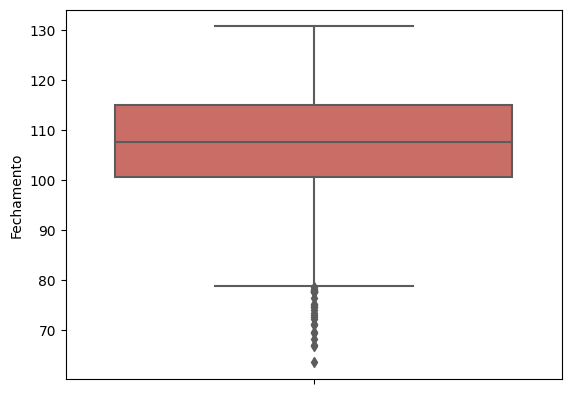

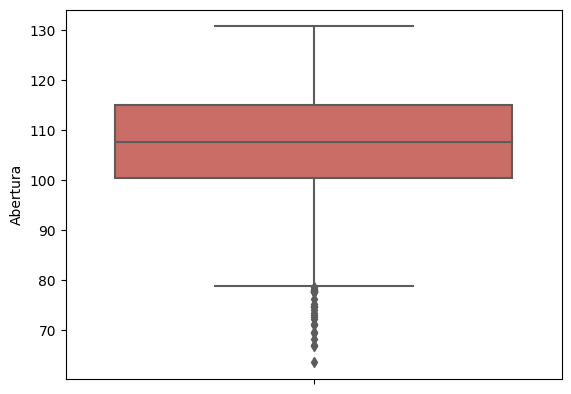

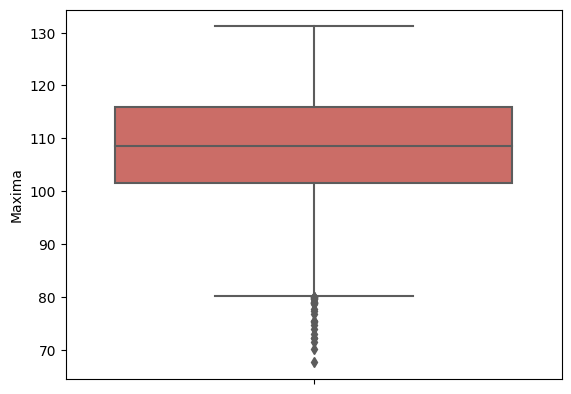

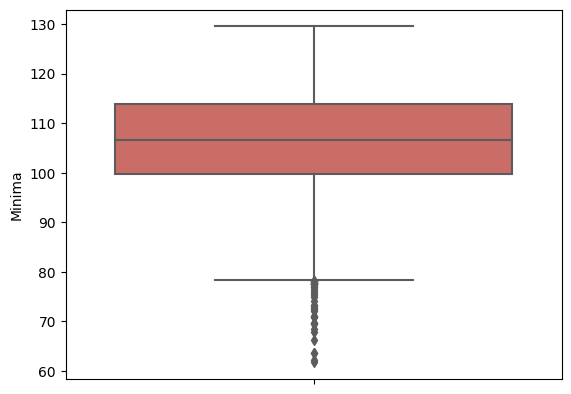

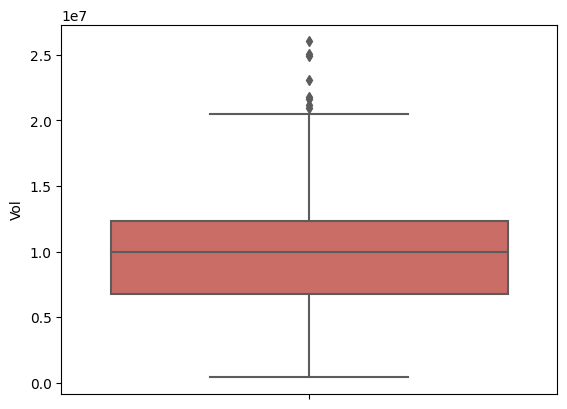

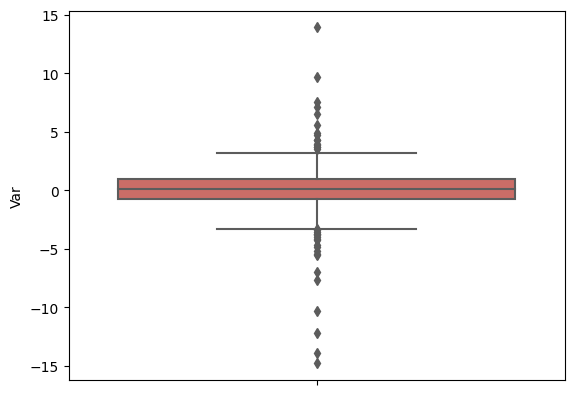

In [154]:
sns.boxplot(y="Fechamento", data=df, palette="hls")
plt.show()
sns.boxplot(y="Abertura", data=df, palette="hls")
plt.show()
sns.boxplot(y="Maxima", data=df, palette="hls")
plt.show()
sns.boxplot(y="Minima", data=df, palette="hls")
plt.show()
sns.boxplot(y="Vol", data=df, palette="hls")
plt.show()
sns.boxplot(y="Var", data=df, palette="hls")
plt.show()

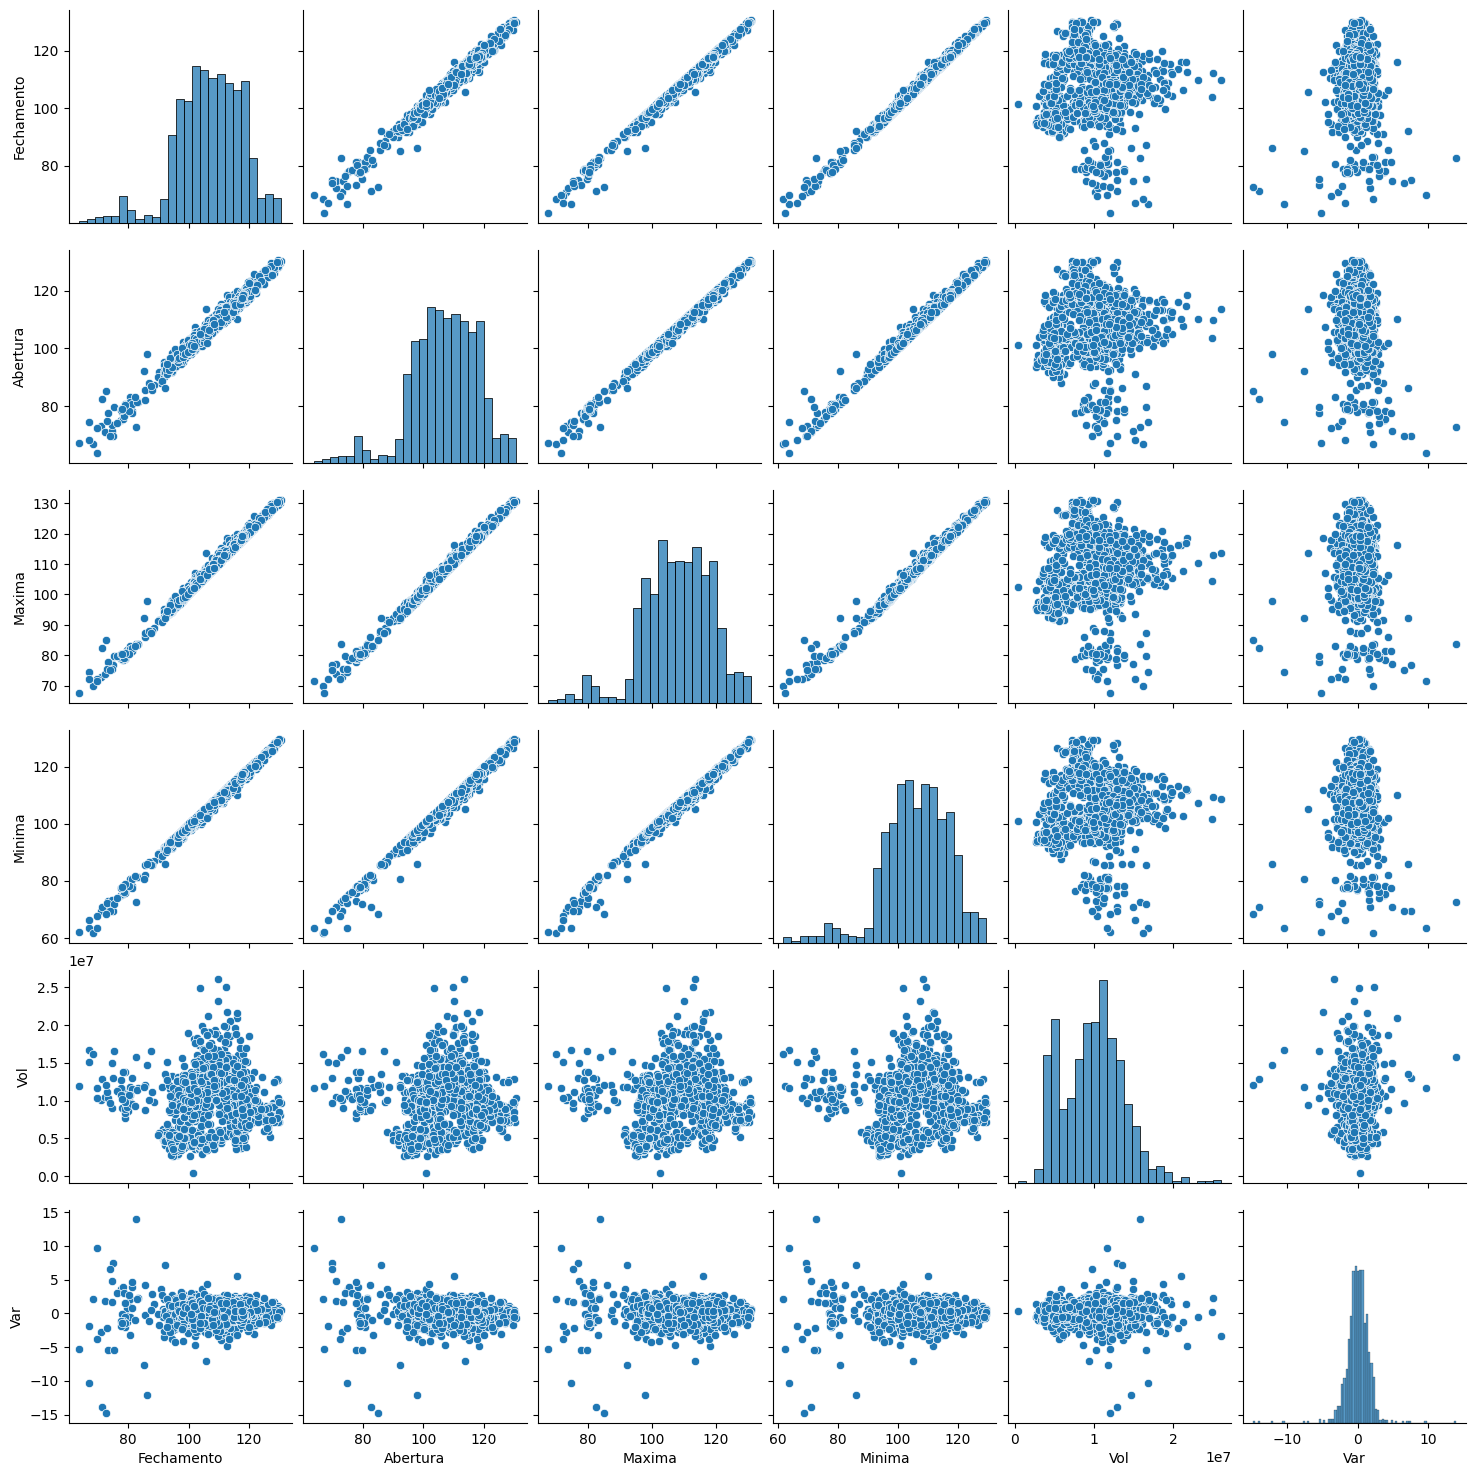

In [155]:
sns.pairplot(df, vars=['Fechamento','Abertura','Maxima','Minima','Vol', "Var"])

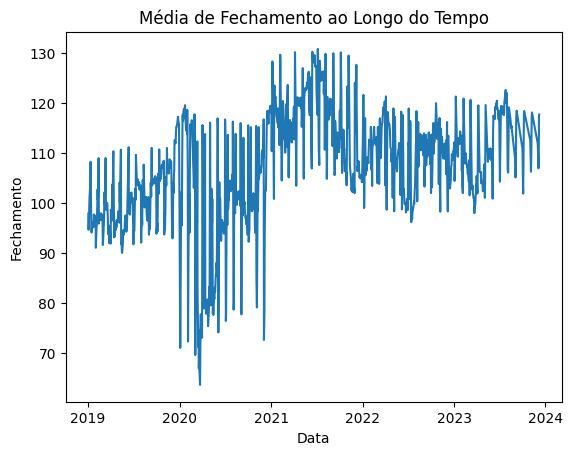

In [156]:
plt.plot(df.index, df["Fechamento"])
plt.xlabel("Data")
plt.ylabel("Fechamento")
plt.title("Média de Fechamento ao Longo do Tempo")
plt.show()

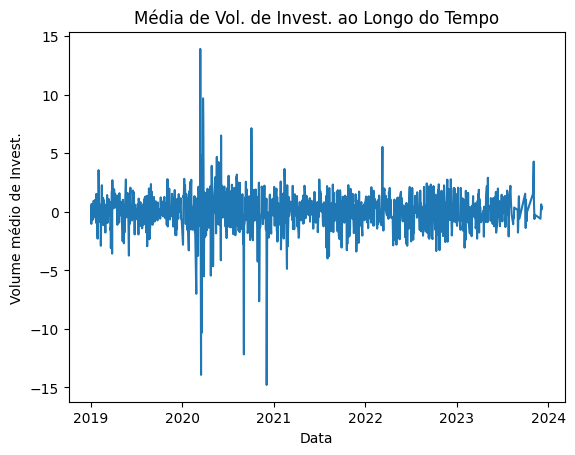

In [157]:
plt.plot(df.index, df["Var"])
plt.xlabel("Data")
plt.ylabel("Volume médio de Invest.")
plt.title("Média de Vol. de Invest. ao Longo do Tempo")
plt.show()

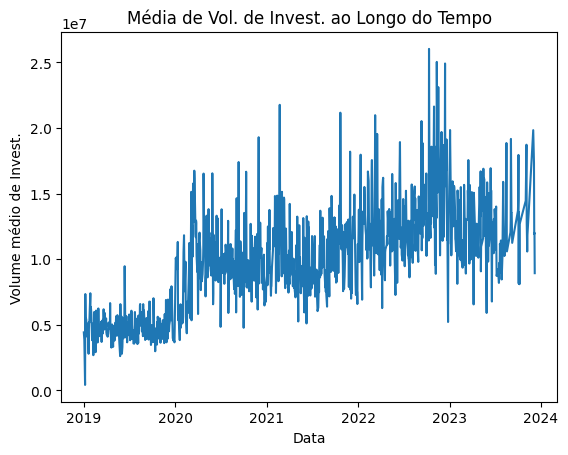

In [158]:
plt.plot(df.index, df["Vol"])
plt.xlabel("Data")
plt.ylabel("Volume médio de Invest.")
plt.title("Média de Vol. de Invest. ao Longo do Tempo")
plt.show()

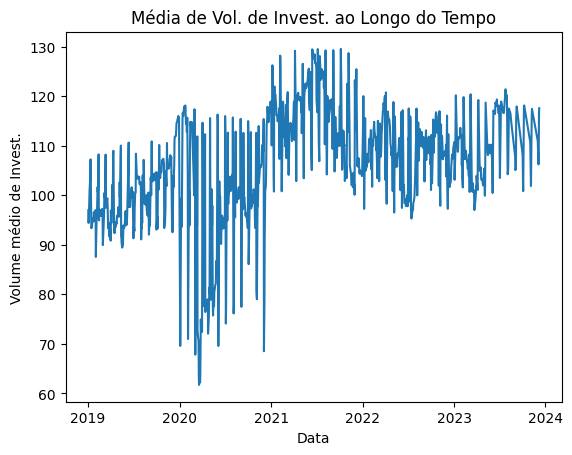

In [159]:
plt.plot(df.index, df["Minima"])
plt.xlabel("Data")
plt.ylabel("Volume médio de Invest.")
plt.title("Média de Vol. de Invest. ao Longo do Tempo")
plt.show()

<Axes: >

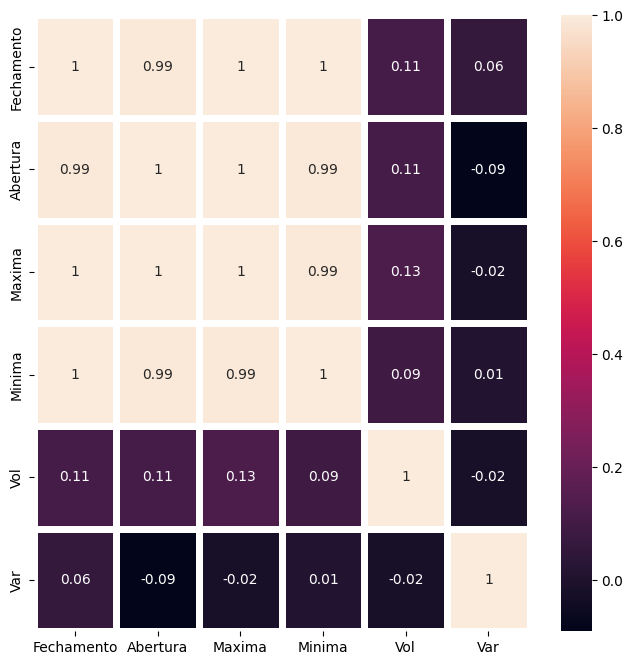

In [160]:
correlation_matriz = df.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data = correlation_matriz, annot=True, linewidths=5, ax=ax)

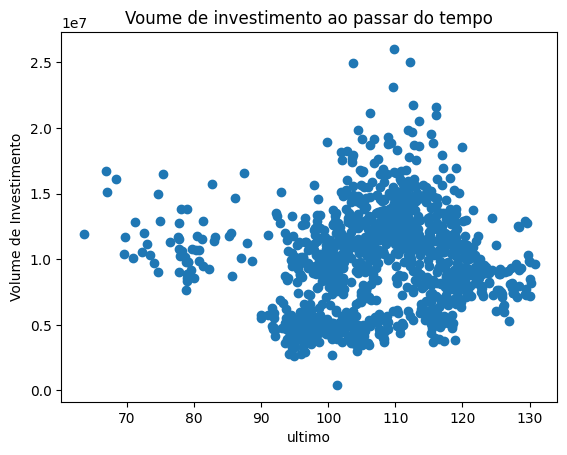

In [161]:
plt.scatter(df["Fechamento"], df["Vol"])
plt.xlabel("ultimo")
plt.ylabel("Volume de Investimento")
plt.title("Voume de investimento ao passar do tempo")
plt.show()

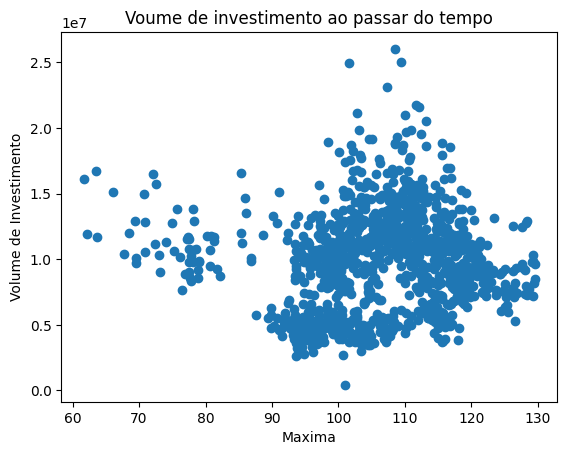

In [162]:
plt.scatter(df["Minima"], df["Vol"])
plt.xlabel("Maxima")
plt.ylabel("Volume de Investimento")
plt.title("Voume de investimento ao passar do tempo")
plt.show()

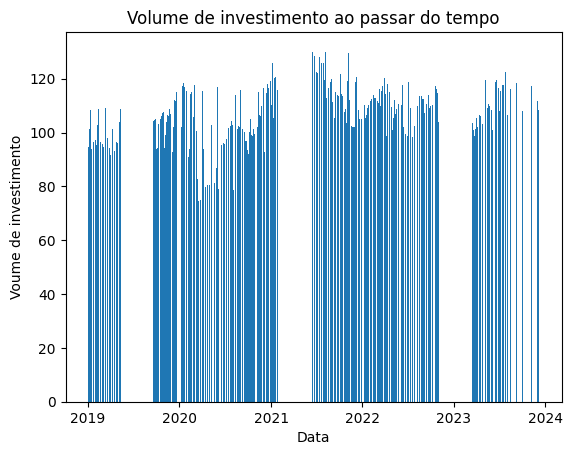

In [163]:
plt.bar(df.index, df["Fechamento"])
plt.xlabel("Data")
plt.ylabel("Voume de investimento")
plt.title("Volume de investimento ao passar do tempo")
plt.show()

In [164]:
print("Data Inicial:", df.index.min())

Data Inicial: 2019-01-02 00:00:00


In [165]:
print("Data Final:", df.index.max())

Data Final: 2023-12-07 00:00:00


In [166]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf

#*Tendência - Direção
#*Sazonalidade - Recorrência das oscilações
#*Resíduo - O que sobra do sinal

In [167]:
dec_Vol = seasonal_decompose(df['Fechamento'], period=7)

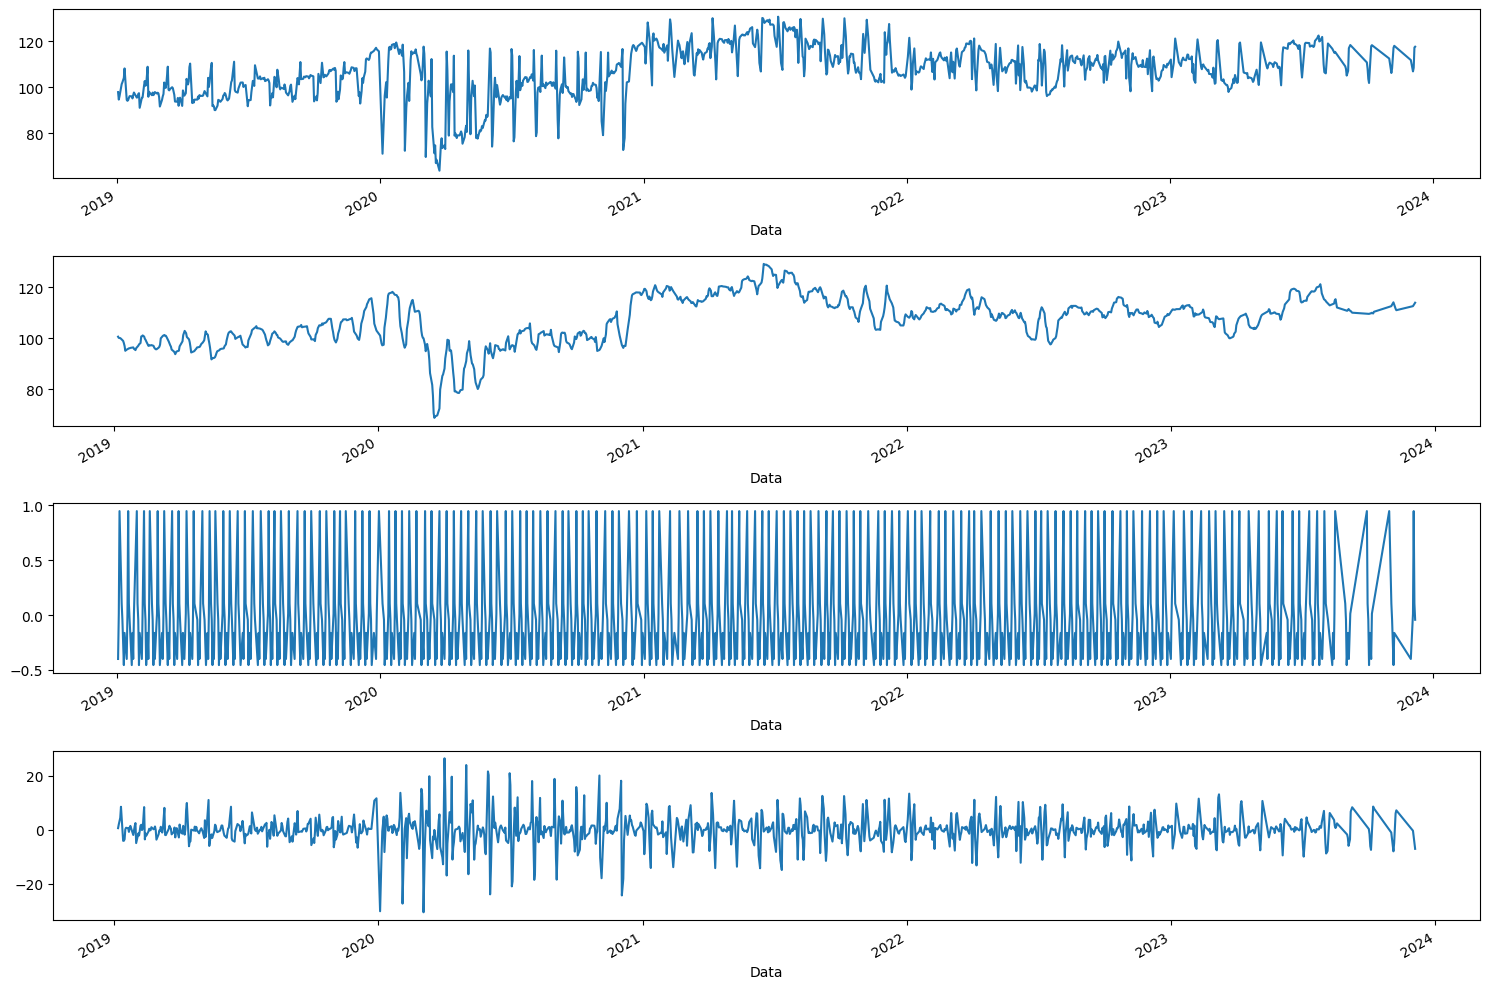

In [168]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,10))
dec_Vol.observed.plot(ax=ax1)
dec_Vol.trend.plot(ax=ax2)
dec_Vol.seasonal.plot(ax=ax3)
dec_Vol.resid.plot(ax=ax4)
plt.tight_layout()

In [169]:
dec_Max = seasonal_decompose(df['Maxima'], period=7)

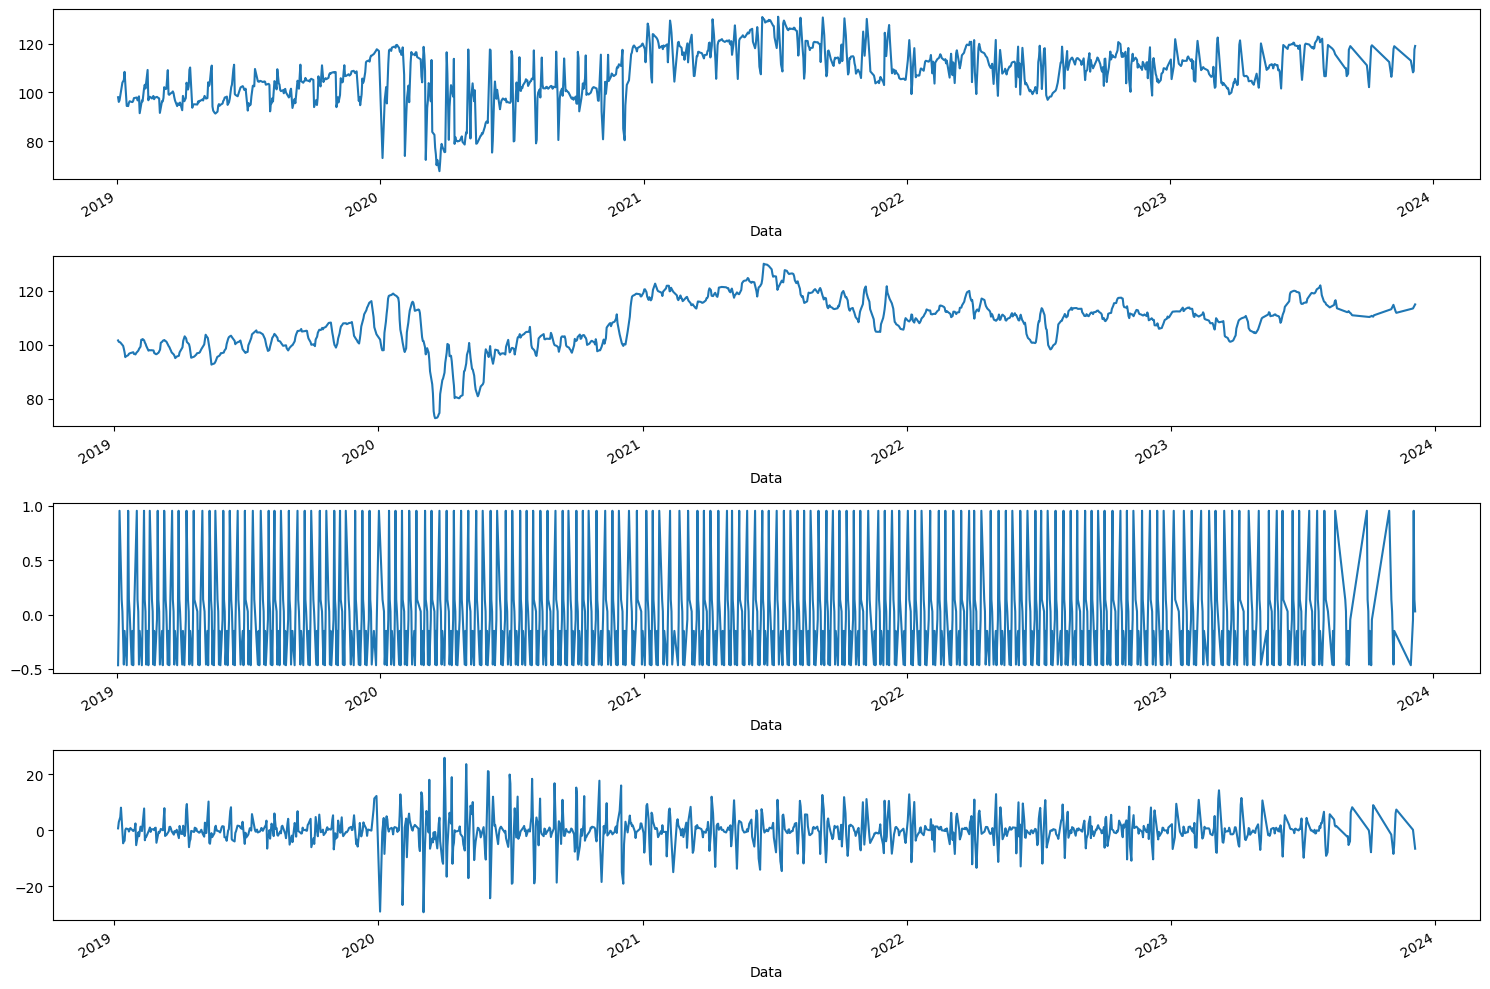

In [170]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,10))
dec_Max.observed.plot(ax=ax1)
dec_Max.trend.plot(ax=ax2)
dec_Max.seasonal.plot(ax=ax3)
dec_Max.resid.plot(ax=ax4)
plt.tight_layout()

#Intentificando Estacionária ou não Estacionária

## Teste ADF - (Augmented Dickey Fuller)

  H0 - Hipótese Nula (não Estacionária)
  
  H1 - Hipótese Alternativa (rejeição da hipótese nula)


p-value = 0.05 (5%) , então rejeitamos H0 com um nível de confiança de 95%

In [171]:
from statsmodels.tsa.stattools import adfuller

In [172]:
df_dickeyF=df.Fechamento.values

In [173]:
R_dickeyF = adfuller(df_dickeyF)

print("teste ABF")
print(f"Teste Estatistico: {R_dickeyF[0]}")
print(f"p-value: {R_dickeyF[1]}")
print(f"Valores Críticos: ")

for key, value in R_dickeyF[4].items():
  print(f"\t{key}: {value}")

teste ABF
Teste Estatistico: -2.296665734211388
p-value: 0.17304559375552703
Valores Críticos: 
	1%: -3.436155341313321
	5%: -2.8641034026875123
	10%: -2.568134825546958


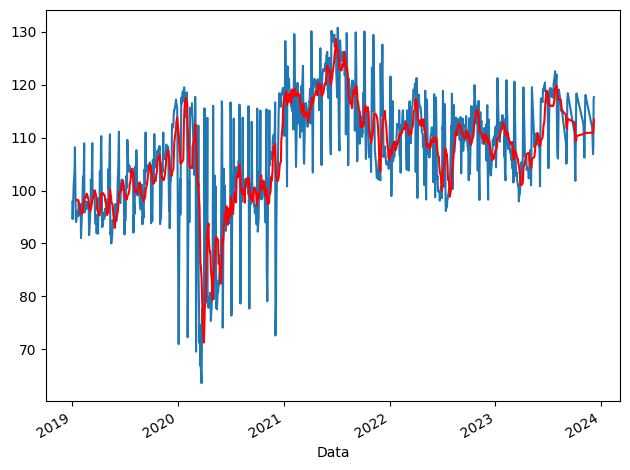

In [174]:
df_rol = df["Fechamento"].rolling(12).mean()

f, ax = plt.subplots()
df["Fechamento"].plot(ax=ax, legend=False)
df_rol.plot(ax=ax, legend=False, color="r")
plt.tight_layout()

#PROPHET - Meta --> analise de time series
https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [175]:
from prophet import Prophet

In [ ]:
df_prof=pd.read_csv("/content/Dados Históricos - Ibovespa_4anos.csv", sep=",")
df_prof.head()

In [177]:
df_prof = df_prof[['Data', 'Último']]
df_prof

,Data,Último
0,18.08.2023,115.409
1,17.08.2023,114.982
2,16.08.2023,115.592
3,15.08.2023,116.171
4,14.08.2023,116.810
...,...,...
1148,08.01.2019,92.032
1149,07.01.2019,91.699
1150,04.01.2019,91.841
1151,03.01.2019,91.564


In [178]:
df_prof.rename(columns={'Data': 'ds', "Último":"y"}, inplace=True)
df_prof

,ds,y
0,18.08.2023,115.409
1,17.08.2023,114.982
2,16.08.2023,115.592
3,15.08.2023,116.171
4,14.08.2023,116.810
...,...,...
1148,08.01.2019,92.032
1149,07.01.2019,91.699
1150,04.01.2019,91.841
1151,03.01.2019,91.564


In [179]:
df_prof1 = Prophet()
df_prof1.fit(df_prof)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpltlgq51i/ok0y1kso.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpltlgq51i/om0c84qq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88888', 'data', 'file=/tmp/tmpltlgq51i/ok0y1kso.json', 'init=/tmp/tmpltlgq51i/om0c84qq.json', 'output', 'file=/tmp/tmpltlgq51i/prophet_modeliv9bq6gj/prophet_model-20230820223819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:38:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:38:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [180]:
future = df_prof1.make_future_dataframe(periods=365)
future.tail()

,ds
1513,2024-12-02
1514,2024-12-03
1515,2024-12-04
1516,2024-12-05
1517,2024-12-06


In [181]:
forecast = df_prof1.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1513,2024-12-02,114.784964,100.220875,130.024324
1514,2024-12-03,114.461880,100.417875,130.210671
1515,2024-12-04,115.167626,101.048888,130.074790
1516,2024-12-05,115.390398,102.052551,129.454214
1517,2024-12-06,115.287392,100.583552,129.464661


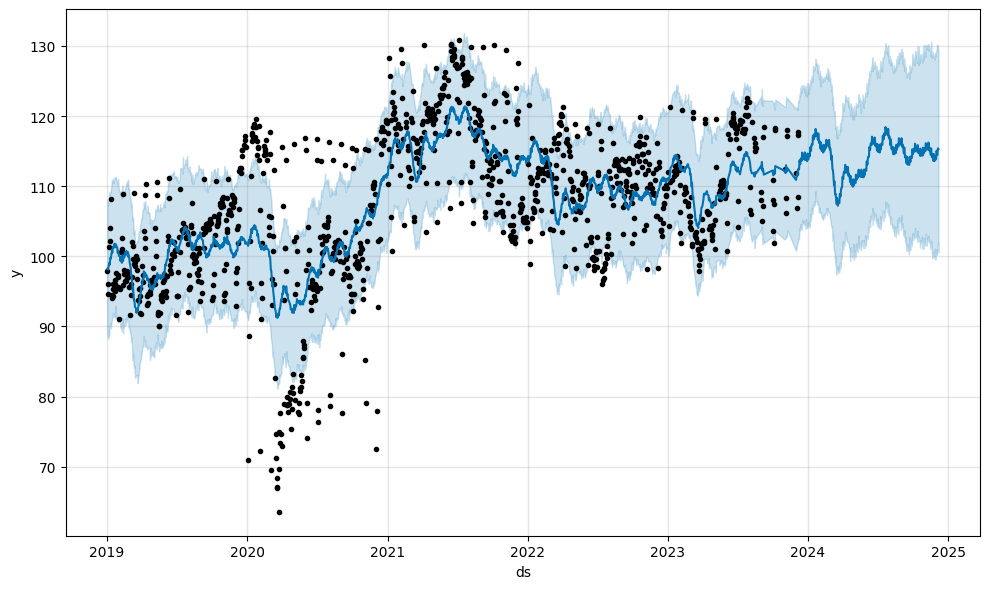

In [182]:
fig1 = df_prof1.plot(forecast)

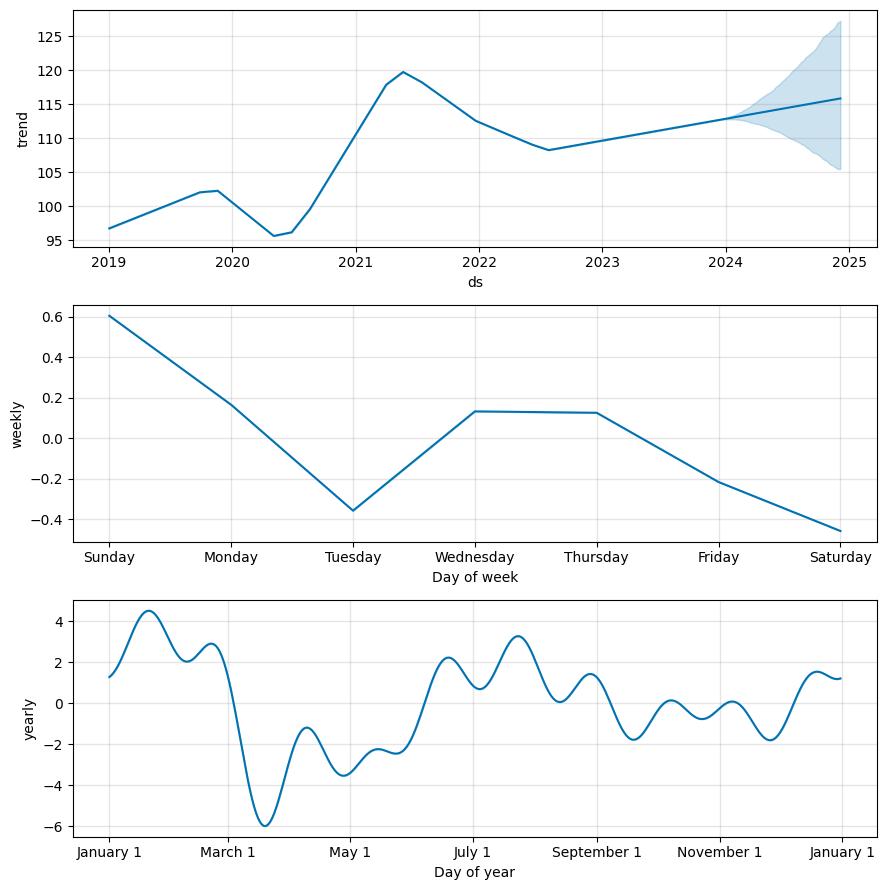

In [183]:
fig2 = df_prof1.plot_components(forecast)

In [184]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(df_prof1, forecast)

In [185]:
plot_components_plotly(df_prof1, forecast)

In [186]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

#Forecasting

In [328]:
df_1=pd.read_csv("/content/Dados Históricos - Ibovespa_4anos.csv", sep=",")
df_1.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,18.08.2023,115.409,114.973,115.729,114.423,"10,60M","0,37%"
1,17.08.2023,114.982,115.592,116.610,114.859,"12,75M","-0,53%"
2,16.08.2023,115.592,116.171,117.338,115.534,"18,86M","-0,50%"
3,15.08.2023,116.171,116.809,117.697,116.033,"14,64M","-0,55%"
4,14.08.2023,116.810,118.067,118.082,116.530,"11,20M","-1,06%"


In [329]:
def convert_to_float(value):
    if "M" in value:
        return float(value.replace("M", "").replace(",", ".")) * 10000
    elif "K" in value:
        return float(value.replace("K", "").replace(",", ".")) * 10
    else:
        return float(value.replace(",", "."))

df_1["Vol."] = df_1["Vol."].apply(convert_to_float)

print(df_1)

            Data   Último  Abertura   Máxima   Mínima      Vol.    Var%
0     18.08.2023  115.409   114.973  115.729  114.423  106000.0   0,37%
1     17.08.2023  114.982   115.592  116.610  114.859  127500.0  -0,53%
2     16.08.2023  115.592   116.171  117.338  115.534  188600.0  -0,50%
3     15.08.2023  116.171   116.809  117.697  116.033  146400.0  -0,55%
4     14.08.2023  116.810   118.067  118.082  116.530  112000.0  -1,06%
...          ...      ...       ...      ...      ...       ...     ...
1148  08.01.2019   92.032    91.699   92.231   91.064   46400.0   0,36%
1149  07.01.2019   91.699    91.845   92.552   91.288   47100.0  -0,15%
1150  04.01.2019   91.841    91.577   92.701   90.824   54900.0   0,30%
1151  03.01.2019   91.564    91.011   91.596   89.922   62500.0   0,61%
1152  02.01.2019   91.012    87.887   91.479   87.536   57900.0   3,56%

[1153 rows x 7 columns]


In [330]:
df_1.describe()

,Último,Abertura,Máxima,Mínima,Vol.
count,1153.000000,1153.000000,1153.000000,1153.000000,1153.000000
mean,107.048034,107.024967,108.057820,105.992696,98292.145013
std,10.954091,10.965904,10.771892,11.106725,38238.770484
min,63.570000,63.604000,67.604000,61.691000,4243.200000
25%,100.553000,100.553000,101.560000,99.630000,68000.000000
50%,107.629000,107.582000,108.602000,106.624000,99900.000000
75%,115.121000,115.093000,115.863000,113.945000,123200.000000
max,130.776000,130.776000,131.190000,129.526000,260300.000000


In [331]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153 entries, 0 to 1152
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      1153 non-null   object 
 1   Último    1153 non-null   float64
 2   Abertura  1153 non-null   float64
 3   Máxima    1153 non-null   float64
 4   Mínima    1153 non-null   float64
 5   Vol.      1153 non-null   float64
 6   Var%      1153 non-null   object 
dtypes: float64(5), object(2)
memory usage: 63.2+ KB


In [332]:
df_1.rename(columns={"Vol.": "Volume"}, inplace=True)

In [333]:
df_1.head()

,Data,Último,Abertura,Máxima,Mínima,Volume,Var%
0,18.08.2023,115.409,114.973,115.729,114.423,106000.0,"0,37%"
1,17.08.2023,114.982,115.592,116.610,114.859,127500.0,"-0,53%"
2,16.08.2023,115.592,116.171,117.338,115.534,188600.0,"-0,50%"
3,15.08.2023,116.171,116.809,117.697,116.033,146400.0,"-0,55%"
4,14.08.2023,116.810,118.067,118.082,116.530,112000.0,"-1,06%"


In [334]:
df_1 = df_1[["Data", "Último", "Volume"]]
df_1 = df_1.rename(columns={"Data": "ds", "Último": "y", "Volume": "unique_id"})

In [335]:
df_1

,ds,y,unique_id
0,18.08.2023,115.409,106000.0
1,17.08.2023,114.982,127500.0
2,16.08.2023,115.592,188600.0
3,15.08.2023,116.171,146400.0
4,14.08.2023,116.810,112000.0
...,...,...,...
1148,08.01.2019,92.032,46400.0
1149,07.01.2019,91.699,47100.0
1150,04.01.2019,91.841,54900.0
1151,03.01.2019,91.564,62500.0


In [336]:
df_1['ds'] = pd.to_datetime(df_1['ds'])

In [337]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153 entries, 0 to 1152
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         1153 non-null   datetime64[ns]
 1   y          1153 non-null   float64       
 2   unique_id  1153 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 27.1 KB


In [305]:
!pip install statsforecast

In [338]:
df_1.tail()

,ds,y,unique_id
1148,2019-08-01,92.032,46400.0
1149,2019-07-01,91.699,47100.0
1150,2019-04-01,91.841,54900.0
1151,2019-03-01,91.564,62500.0
1152,2019-02-01,91.012,57900.0


In [339]:
treino = df_1.loc[df_1["ds"]<"2022-10-01"]
valid = df_1.loc[(df_1["ds"]>="2022-10-01")&(df_1["ds"]<"2023-02-18")]
h = valid["ds"].nunique() #validação do período "valid" (3meses)

In [340]:
h

90

In [341]:
def wmape(y_true, y_pred):
  return np.abs(y_true-y_pred).sum()/np.abs(y_true).sum()

In [342]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA

WMAPE: nan%


ValueError: ignored

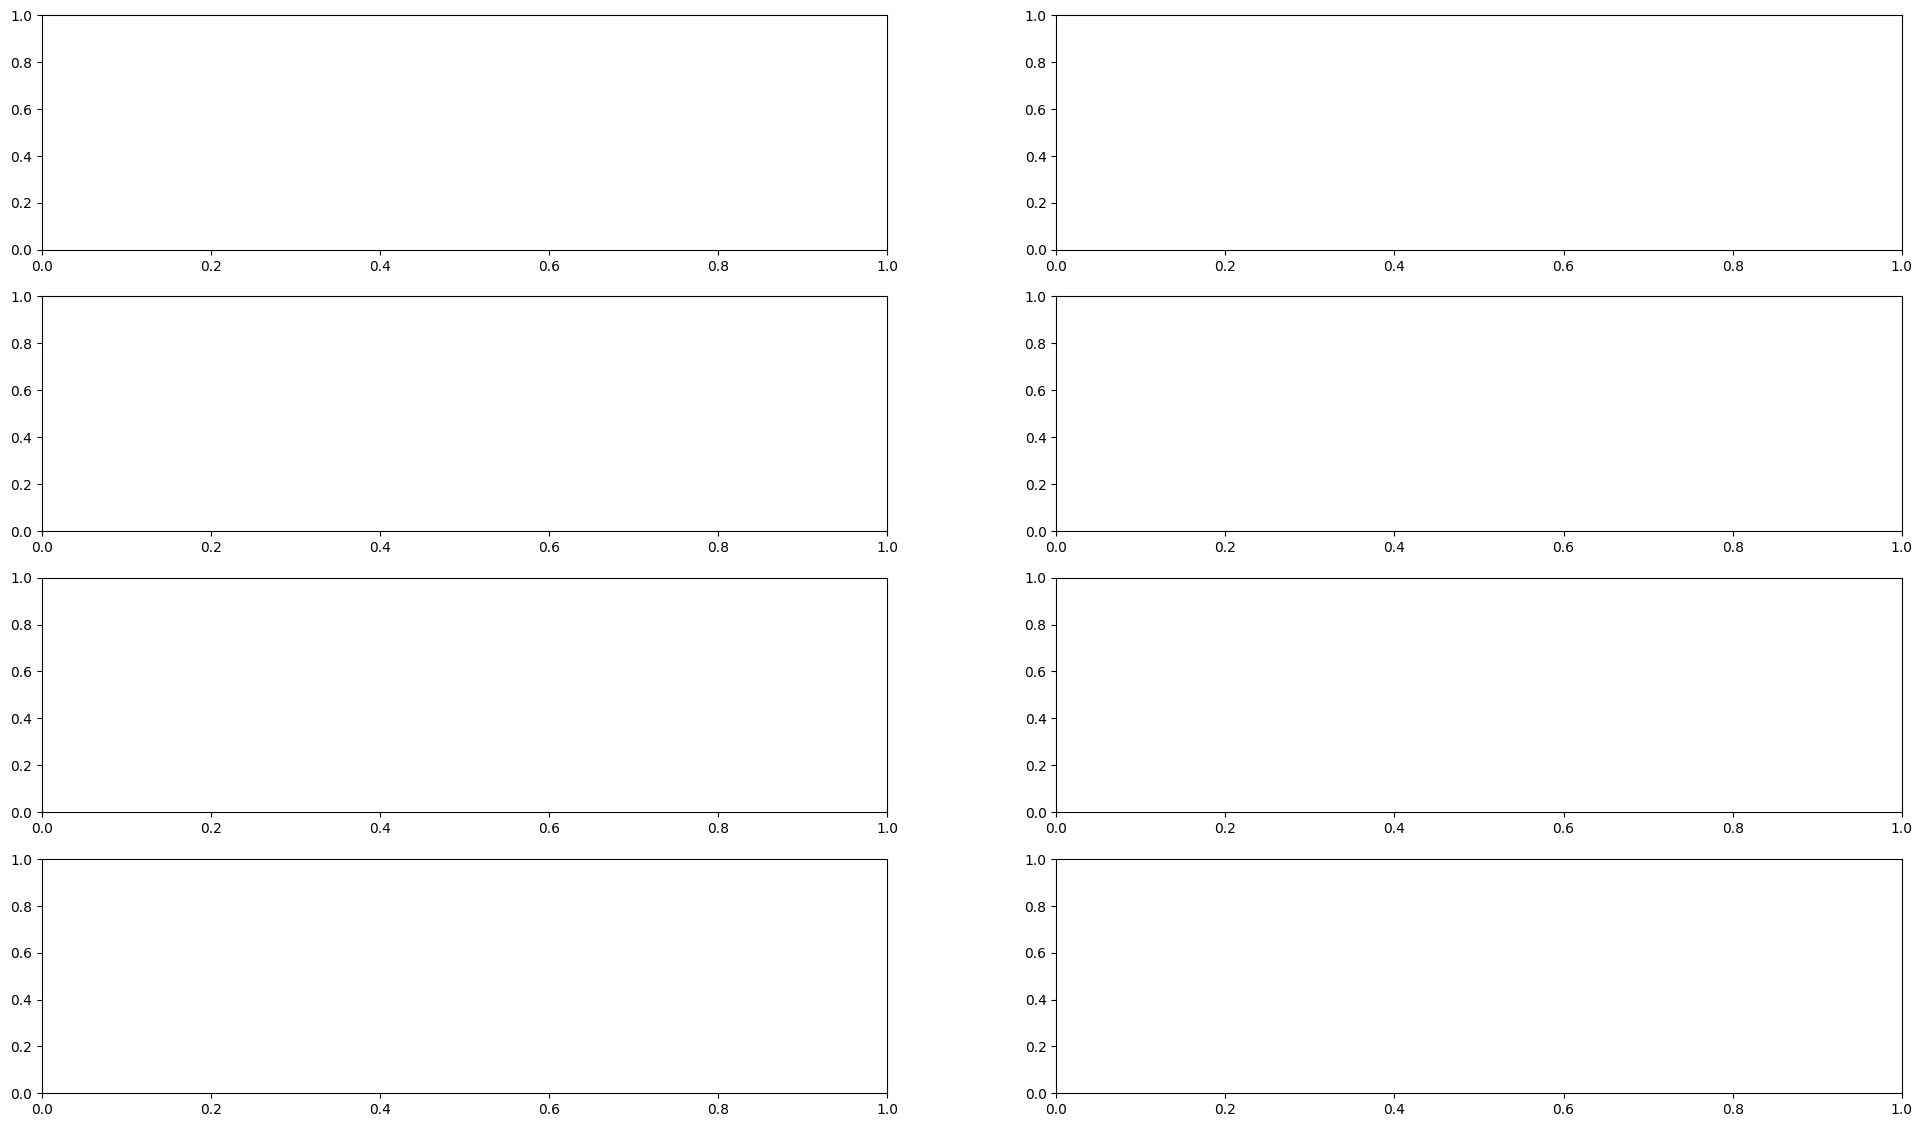

In [346]:
model = StatsForecast(models=[Naive()], freq="D", n_jobs=-1)
model.fit(treino)

forecast_df = model.predict(h=h, level=[90])
forecast_df = forecast_df.reset_index().merge(valid, on=["ds", "unique_id"], how="left")

wmape1 = wmape(forecast_df["y"].values, forecast_df["Naive"].values)
print(f"WMAPE: {wmape1:.2%}")

model.plot(treino, forecast_df, level=[90], unique_ids=forecast_df["unique_id"], engine="matplotlib", max_insample_length=90)